<a href="https://colab.research.google.com/github/bobovnii/CorrectionsWorkspace/blob/master/JDAtask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns                       
import matplotlib.pyplot as plt             
%matplotlib inline     
sns.set(color_codes=True)
import pickle
from sklearn import ensemble
from sklearn.preprocessing import StandardScaler

In [0]:
inputDataset='hour.csv'
df = pd.read_csv(inputDataset)
df = df.drop(['dteday'], axis=1)


In [42]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
inputDataset2='hour.csv'
DataExploration()

In [0]:
def DataExploration(inputDataset):
  df = pd.read_csv(inputDataset)
  df = df.drop(['dteday'], axis=1)

  TestDataset(df)
  DataSetFeatures = df.describe().loc[['min','max', 'mean','50%'],:]
  print("DataSet Features: ", DataSetFeatures)

  #check for anomalies
  #fig=sns.boxplot(x=df['cnt'])
  #fig.savefig('boxplotOfBikesNumber.png')

  df2= df.drop('instant',axis=1)
  fig=df2.groupby('yr').boxplot(fontsize=20,rot=90,figsize=(20,10),patch_artist=True)
  fig.savefig('boxplotAllForBothYears.png')


  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR = Q3 - Q1

  #possible cleaning in case of many anomalies
  #df=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)].shape

  print('source of many anomalies is windspeed, check boxplot')

  fig=sns.boxplot(x=df['windspeed'])
  fig.savefig('boxplotWindspeed.png')
  


  #variable correlations

  plt.figure(figsize=(15,10))
  c= df.corr()
  fig=sns.heatmap(c,cmap="BrBG",annot=True)
  fig.savefig('HeatMap.png')


  #plot hist and check balance
  fig=df.hr.value_counts().nlargest(24).plot(kind='bar', figsize=(10,5))
  plt.title("Number of inputs by hours")
  plt.ylabel('Number of inputs')
  plt.xlabel('hour');
  fig.savefig('HoursHist.png')

  fig=df.weathersit.value_counts().nlargest(24).plot(kind='bar', figsize=(10,5))
  plt.title("Number of inputs by weather")
  plt.ylabel('Number of inputs')
  plt.xlabel('weather');
  fig.savefig('WeatherHist.png')

  df.yr.value_counts().nlargest(24).plot(kind='bar', figsize=(10,5))
  plt.title("year")
  plt.ylabel('Number of inputs')
  plt.xlabel('year');

  #scatter plots:

  df2a = df.drop(['cnt','casual','registered','instant'],axis=1)
  df2a.index = df['cnt']
  fig=df2a.plot(subplots=True, style='.', figsize=(10,40))
  plt.legend(loc='best')
  plt.show()
  fig.savefig('AllScatterPlots.png')

  #better scatter plots for some importnat variables

  df.temp.head(5)
  t_min= -8
  t_max= +39
  coloumn=(df.temp*(t_max-t_min))+t_min

  fig, ax = plt.subplots(figsize=(10,6))
  ax.scatter(coloumn, df['cnt'])
  ax.set_xlabel('temperature')
  ax.set_ylabel('total bike number')
  fig.savefig('ScatterPlotTemperature.png')

  fig, ax = plt.subplots(figsize=(10,6))
  ax.scatter(df['weekday'], df['cnt'])
  ax.set_xlabel('weekday')
  plt.xticks((0,1,2,3,4,5,6), ('Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'))
  ax.set_ylabel('total bike number')
  fig.savefig('ScatterPlotDays.png')
















In [0]:
def TestDataset(df_test):
  duplicate_rows_df = df_test[df_test.duplicated()]
  print("number of duplicate rows: ", duplicate_rows_df.shape,"if # of duplicate rows > 0, you may use df.drop_duplicates()")

  #test for nan values
  assert not df_test.isnull().values.any(), 'nan value is found in the input dataset, you may use df.dropna()' 

  #test for coloumns matching
  check = df_test.columns == ['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt']
  assert not (False in check), 'columns names dont match'

  #test for non-numerical values
  assert not (False in df_test.applymap(np.isreal).all(1).values), 'non-numerical values were found, you may use df[~df.applymap(np.isreal).all(1)] to check them' 



In [61]:
TestDataset(df)

number of duplicate rows:  (0, 16)  you may use df.drop_duplicates()


In [0]:
df

In [17]:
False in df.applymap(np.isreal).all(1)

True

In [0]:
assert not (False in df.applymap(np.isreal).all(1)), 'non-numerical values were found, you may use df[~df.applymap(np.isreal).all(1)] to check them'

AssertionError: ignored

In [0]:
def TrainAndTest():

In [0]:

df = pd.read_csv("hour.csv")
# Test dataframe
df.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [0]:
# Checking the data type
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [0]:
# Dropping irrelevant columns
#df = df.drop([‘Engine Fuel Type’, ‘Market Category’, ‘Vehicle Style’, ‘Popularity’, ‘Number of Doors’, ‘Vehicle Size’], axis=1)
#df.head(5)

In [0]:
df.shape

(17379, 17)

In [0]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 17)


In [0]:
df.describe().loc[['min','max', 'mean','50%'],:]

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
min,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.00000,0.000000,0.000000,0.000000,0.0000,1.000000
max,15787.0,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.00000,1.000000,0.850700,367.000000,886.0000,977.000000
mean,7894.0,2.400329,0.452398,6.049154,11.545575,0.027174,2.998733,0.685627,1.414138,0.512642,0.48945,0.626009,0.190301,36.712593,152.2131,188.925694
50%,7894.0,2.000000,0.000000,6.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.540000,0.50000,0.630000,0.194000,17.000000,114.0000,141.000000


In [0]:
df.count()

instant       17379
dteday        17379
season        17379
yr            17379
mnth          17379
hr            17379
holiday       17379
weekday       17379
workingday    17379
weathersit    17379
temp          17379
atemp         17379
hum           17379
windspeed     17379
casual        17379
registered    17379
cnt           17379
dtype: int64

In [0]:
#df = df.drop_duplicates()
#df.head(5)

In [0]:
# Renaming the column names
#df = df.rename(columns={“Engine HP”: “HP”, “Engine Cylinders”: “Cylinders”, “Transmission Type”: “Transmission”, “Driven_Wheels”: “Drive Mode”,”highway MPG”: “MPG-H”, “city mpg”: “MPG-C”, “MSRP”: “Price” })
#df.head(5)

In [0]:
#print(df.isnull().sum())
#df = df.dropna()    # Dropping the missing values.
#df.count()

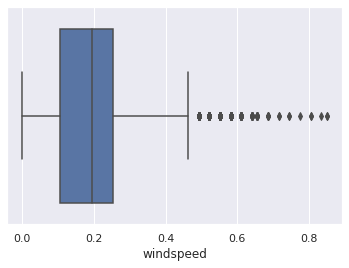

In [22]:
sns.boxplot(x=df['windspeed'])

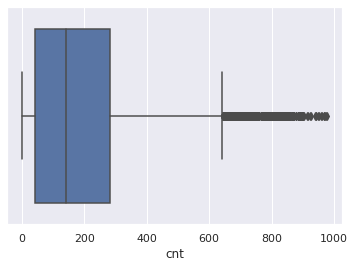

In [0]:
sns.boxplot(x=df['cnt'])

In [0]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

instant       8689.0000
season           1.0000
yr               1.0000
mnth             6.0000
hr              12.0000
holiday          0.0000
weekday          4.0000
workingday       1.0000
weathersit       1.0000
temp             0.3200
atemp            0.2879
hum              0.3000
windspeed        0.1492
casual          44.0000
registered     186.0000
cnt            241.0000
dtype: float64


In [0]:
df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)].shape

(14799, 17)

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
season,0.404046,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136178,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772


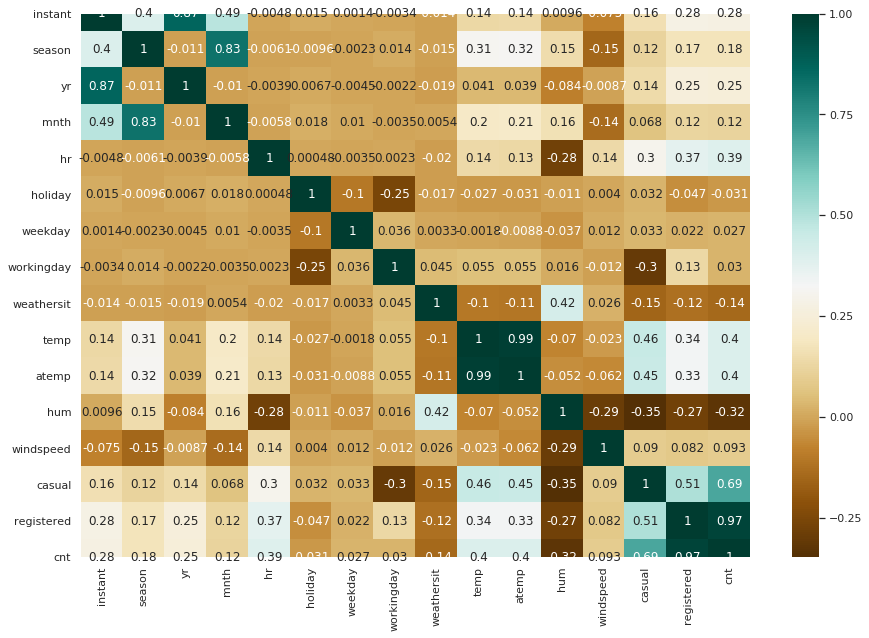

In [0]:
plt.figure(figsize=(15,10))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

In [0]:
df.hr.value_counts().nlargest(24)

16    730
17    730
15    729
13    729
14    729
22    728
18    728
19    728
20    728
21    728
23    728
12    728
10    727
11    727
7     727
9     727
8     727
0     726
6     725
1     724
5     717
2     715
4     697
3     697
Name: hr, dtype: int64

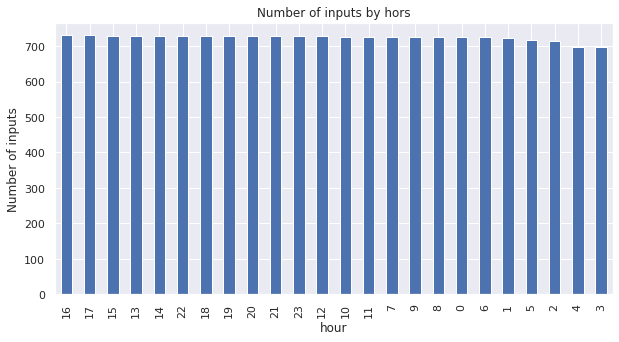

In [0]:


df.hr.value_counts().nlargest(24).plot(kind='bar', figsize=(10,5))
plt.title("Number of inputs by hors")
plt.ylabel('Number of inputs')
plt.xlabel('hour');



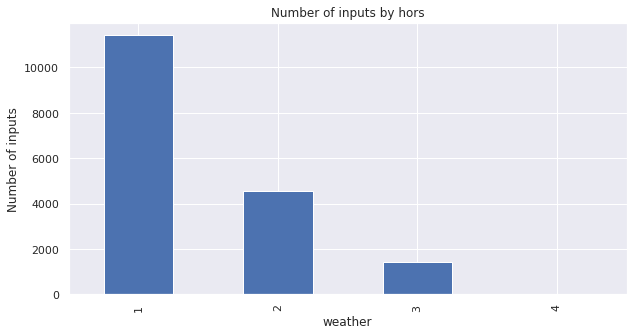

In [0]:
df.weathersit.value_counts().nlargest(24).plot(kind='bar', figsize=(10,5))
plt.title("Number of inputs by hors")
plt.ylabel('Number of inputs')
plt.xlabel('weather');

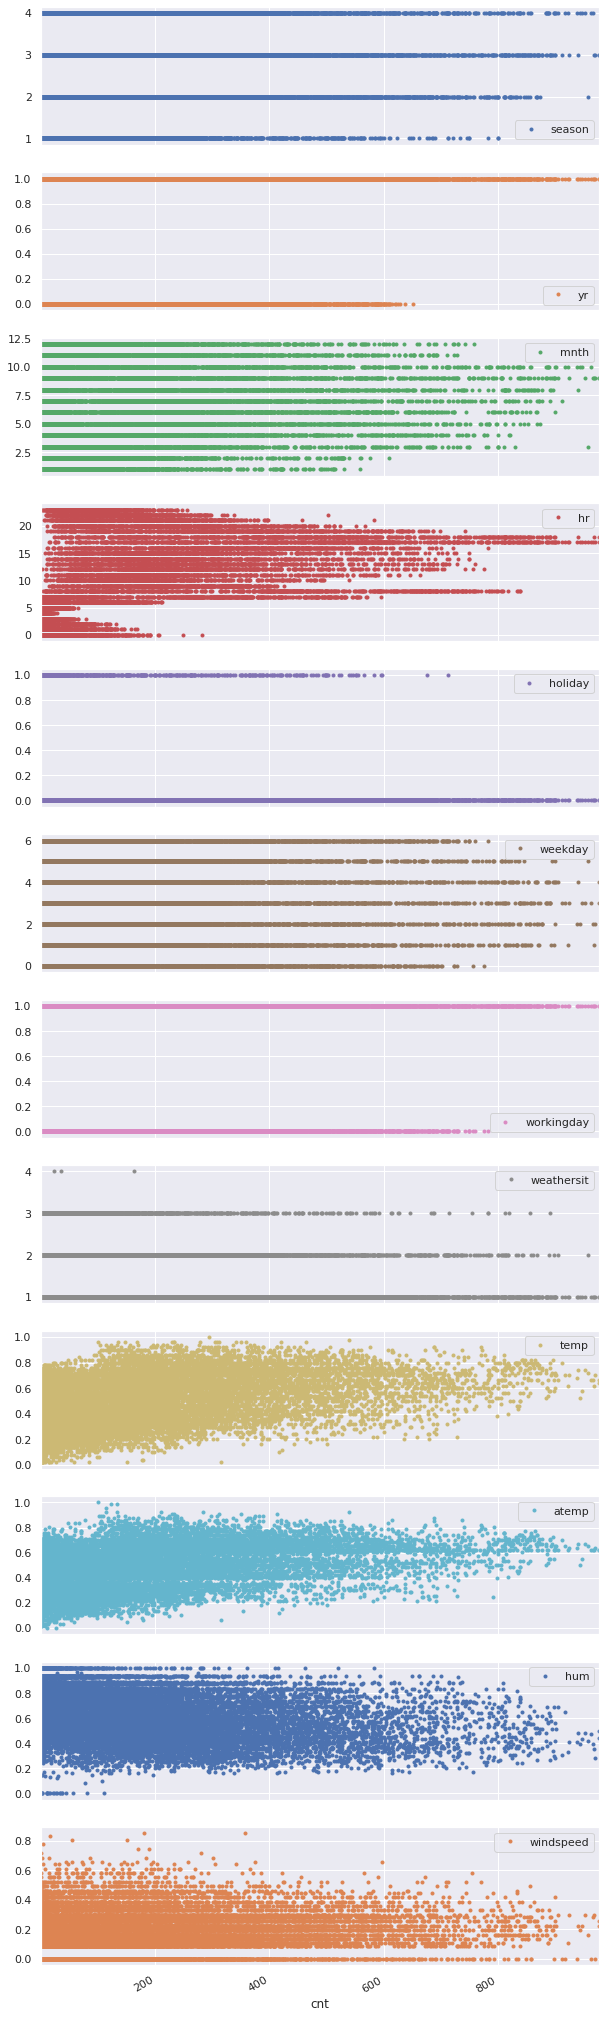

In [35]:

df2a = df.drop(['cnt','casual','registered','instant'],axis=1)
df2a.index = df['cnt']
df2a.plot(subplots=True, style='.', figsize=(10,40))
plt.legend(loc='best')
plt.show()

In [0]:
df.yr.value_counts().nlargest(24)

1    8734
0    8645
Name: yr, dtype: int64

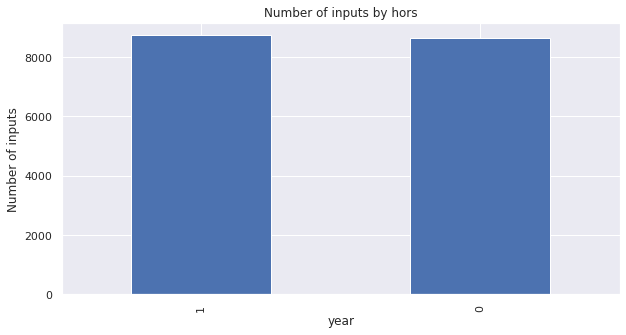

In [0]:
df.yr.value_counts().nlargest(24).plot(kind='bar', figsize=(10,5))
plt.title("Number of inputs by hors")
plt.ylabel('Number of inputs')
plt.xlabel('year');

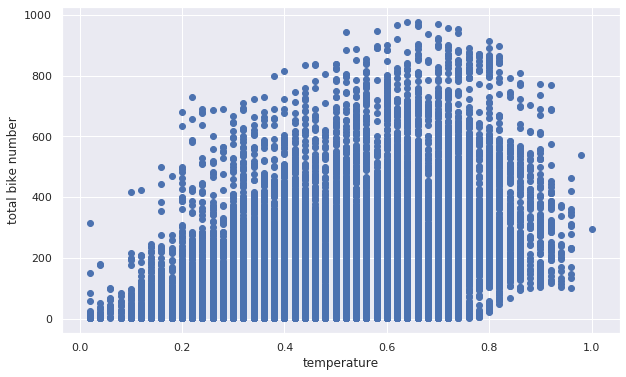

In [0]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['temp'], df['cnt'])
ax.set_xlabel('temperature')
ax.set_ylabel('total bike number')
plt.show()

In [0]:
df.temp.head(5)
t_min= -8
t_max= +39
coloumn=(df.temp*(t_max-t_min))+t_min

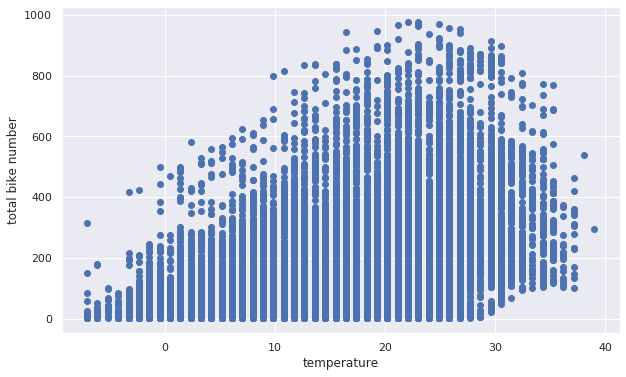

In [0]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(coloumn, df['cnt'])
ax.set_xlabel('temperature')
ax.set_ylabel('total bike number')
plt.show()

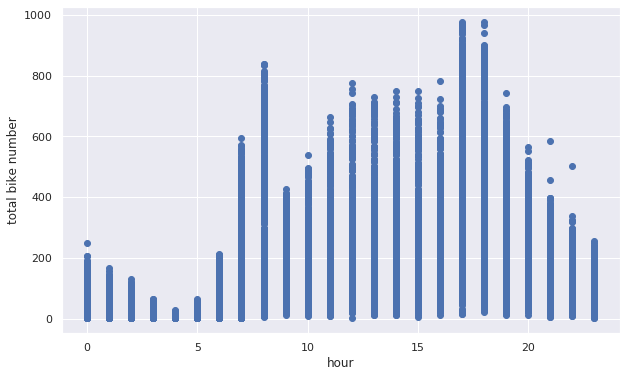

In [0]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['hr'], df['cnt'])
ax.set_xlabel('hour')
ax.set_ylabel('total bike number')
plt.show()

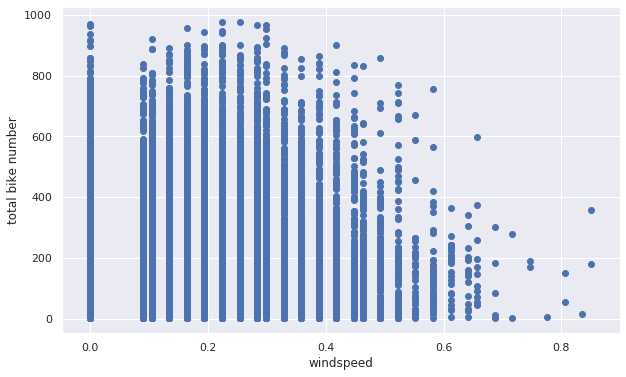

In [37]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['windspeed'], df['cnt'])
ax.set_xlabel('windspeed')
ax.set_ylabel('total bike number')
plt.show()

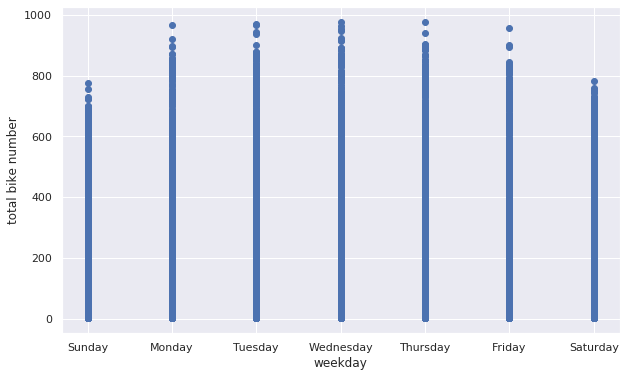

In [0]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['weekday'], df['cnt'])
ax.set_xlabel('weekday')
plt.xticks((0,1,2,3,4,5,6), ('Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'))
ax.set_ylabel('total bike number')
plt.show()

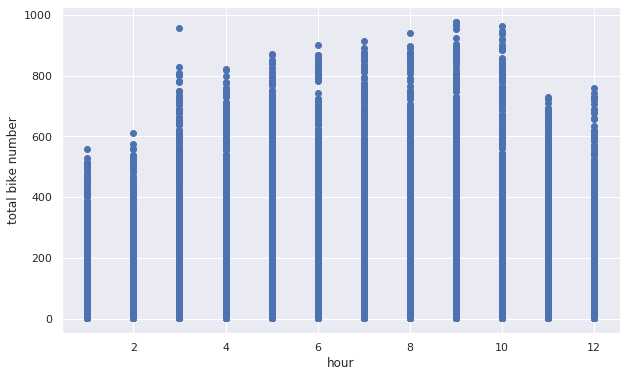

In [0]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['mnth'], df['cnt'])
ax.set_xlabel('hour')
ax.set_ylabel('month')
plt.show()

In [0]:
#predictive model

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [0]:
#cleaning data, removing redundent info and separting the features from the labels
feat = df.drop(columns=['cnt','instant','dteday','season','casual','registered','cnt','yr'],axis=1)
label = df['cnt']

In [0]:
label.head(5)
feat.head(5)

,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0
1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0
2,1,2,0,6,0,1,0.22,0.2727,0.80,0.0
3,1,3,0,6,0,1,0.24,0.2879,0.75,0.0
4,1,4,0,6,0,1,0.24,0.2879,0.75,0.0


In [0]:
X_train, X_test, y_train, y_test = train_test_split(feat, label, test_size=0.3)

In [0]:
X_train.head(5)

,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
14217,8,14,0,1,1,1,0.72,0.6667,0.54,0.1642
7120,10,7,0,6,0,3,0.26,0.2273,0.87,0.3582
4482,7,16,0,0,0,1,0.84,0.7576,0.41,0.2836
851,2,22,0,1,1,1,0.28,0.3030,0.81,0.0896
14640,9,5,0,5,1,1,0.62,0.5606,0.88,0.0000


In [0]:
y_train.head(5)

14217    275
7120       7
4482     372
851       37
14640     40
Name: cnt, dtype: int64

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.fit_transform(X_test)

In [0]:
Boosting_Regression = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [0]:
Boosting_Regression.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
Boosting_Regression.score(X_test,y_test)

0.8755887714315653

In [0]:
Boosting_Regression.score(X_train,y_train)

0.9178912328099758

In [0]:
# save the model to disk
filename = 'Boosting_Regression_model.sav'
pickle.dump(Boosting_Regression, open(filename, 'wb'))

In [0]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.8755887714315653


In [0]:
assert 4==4 

In [0]:
assert 5<4

AssertionError: ignored